In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("figs/", exist_ok=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

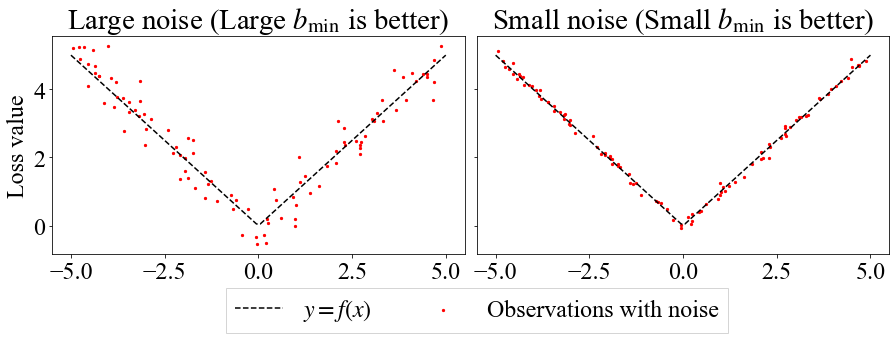

In [8]:
LB, UB = -5, 5
dx = np.linspace(LB, UB, 100)
rng = np.random.RandomState(42)

_, axes = plt.subplots(
    ncols=2,
    figsize=(15, 4),
    sharex=True,
    sharey=True,
    gridspec_kw=dict(wspace=0.03)
)

n_samples = 100
x = rng.random(n_samples) * (UB - LB) + LB
noise1 = rng.normal(size=(n_samples,)) * 0.5
noise2 = rng.normal(size=(n_samples,)) * 0.1

ax = axes[0]
ax.plot(dx, np.abs(dx), color="black", linestyle="dashed")
ax.scatter(x, np.abs(x) + noise1, color="red", s=5)
ax.set_ylabel("Loss value")
ax.set_title("Large noise (Large $b_{\min}$ is better)")

lines = []
labels = ["$y = f(x)$", "Observations with noise"]
ax = axes[1]
line, = ax.plot(dx, np.abs(dx), color="black", linestyle="dashed")
lines.append(line)
line = ax.scatter(x, np.abs(x) + noise2, color="red", s=5)
lines.append(line)
ax.set_title("Small noise (Small $b_{\min}$ is better)")

ax.legend(
    handles=lines,
    labels=labels,
    ncols=len(labels),
    loc="upper center",
    bbox_to_anchor=(0.0, -0.1),
    fancybox=False,
    shadow=False,
)

plt.savefig("figs/noise-and-cardinality.pdf", bbox_inches="tight")